## Gather

In [63]:
import requests  #  all of the packages i plan to use
import os
import pandas as pd
import json
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


### Read `image_predictions.tsv`

In [64]:
folder_name='image_predictions'     # make folder in desk
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [65]:
# get data from web and write it in desk
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
respones=requests.get(url)
with open(os.path.join(folder_name,url.split('/')[-1]),mode='wb') as file:
    file.write(respones.content)

In [66]:
image_predictions=pd.read_csv('image-predictions.tsv',sep='\t')  # put data in Dataframe 

### Read `tweet-json.txt`
<h5 style="color:red;">i failed to have a devloper account in twitter,from week my Application Under Review so i download the file from udacity</h5>

In [67]:
tweet_json=pd.read_json('tweet-json.txt', lines=True)  # put data in datafram by writing line by line

In [68]:
tweet_json_temp=tweet_json[{'id','favorite_count','retweeted','retweet_count'}] # only coulmns i am interested 

### Read `twitter-archive-enhanced.csv`

In [69]:
twitter_archive_enhanced=pd.read_csv('twitter-archive-enhanced.csv')


## Assess

### `image_predictions`

In [70]:
image_predictions.sample(10) # visual Assessment

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1176,737678689543020544,https://pbs.twimg.com/media/CjzC2oGWYAAyIfG.jpg,1,Pembroke,0.935307,True,Cardigan,0.049874,True,Chihuahua,0.011603,True
2051,887473957103951883,https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg,2,Pembroke,0.809197,True,Rhodesian_ridgeback,0.054950,True,beagle,0.038915,True
1405,769940425801170949,https://pbs.twimg.com/media/Cq9guJ5WgAADfpF.jpg,1,miniature_pinscher,0.796313,True,Chihuahua,0.155413,True,Staffordshire_bullterrier,0.030943,True
815,692752401762250755,https://pbs.twimg.com/tweet_video_thumb/CZ0mhd...,1,Samoyed,0.471276,True,Siberian_husky,0.158850,True,Eskimo_dog,0.138672,True
1079,717841801130979328,https://pbs.twimg.com/media/CfZJTphWAAAl5Ys.jpg,1,Brittany_spaniel,0.922876,True,English_springer,0.070113,True,bath_towel,0.002561,False
991,708026248782585858,https://pbs.twimg.com/ext_tw_video_thumb/70802...,1,malinois,0.786468,True,Chesapeake_Bay_retriever,0.068979,True,Siamese_cat,0.029304,False
1040,712092745624633345,https://pbs.twimg.com/media/CeHckpuW4AAF7rT.jpg,1,triceratops,0.235373,False,llama,0.153126,False,three-toed_sloth,0.111840,False
1876,845812042753855489,https://pbs.twimg.com/media/C7ztkInW0AEh1CD.jpg,1,Samoyed,0.979803,True,chow,0.015923,True,white_wolf,0.001303,False
1480,780858289093574656,https://pbs.twimg.com/media/CtYqeNHWgAATqYZ.jpg,1,Chesapeake_Bay_retriever,0.488555,True,Sussex_spaniel,0.271655,True,kelpie,0.106913,True
799,691321916024623104,https://pbs.twimg.com/media/CZgRmk0UcAAxeuQ.jpg,1,Rottweiler,0.508981,True,German_shepherd,0.207897,True,kelpie,0.094353,True


In [71]:
image_predictions.tail(200)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1875,845677943972139009,https://pbs.twimg.com/media/C7xzmngWkAAAp9C.jpg,1,chow,0.808681,True,groenendael,0.123141,True,Newfoundland,0.022143,True
1876,845812042753855489,https://pbs.twimg.com/media/C7ztkInW0AEh1CD.jpg,1,Samoyed,0.979803,True,chow,0.015923,True,white_wolf,0.001303,False
1877,846042936437604353,https://pbs.twimg.com/media/C72_iaUVUAEhZSn.jpg,1,golden_retriever,0.961110,True,Labrador_retriever,0.016695,True,Tibetan_mastiff,0.009082,True
1878,846153765933735936,https://pbs.twimg.com/media/C74kWqoU8AEaf3v.jpg,1,giant_schnauzer,0.346468,True,flat-coated_retriever,0.218451,True,Labrador_retriever,0.108020,True
1879,846514051647705089,https://pbs.twimg.com/media/C79sB4xXwAEvwKY.jpg,2,golden_retriever,0.650003,True,Leonberg,0.065199,True,Norfolk_terrier,0.052955,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


<h5 style="color:red;"> i cannot find  any quality issue from visual assessment</h5>


In [72]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [73]:
image_predictions.p1.value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
desktop_computer        1
water_bottle            1
trombone                1
nail                    1
cuirass                 1
Name: p1, Length: 378, dtype: int64

In [74]:
image_predictions[image_predictions.tweet_id.duplicated()]


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog



<h5 style="color:red">there is not any duplicate values for tweet_ id</h5>
<h5 style="color:red"> from programmatic Assessment i can not find any quality or tidiness issue</h5>

### `twitter_archive_enhanced`

In [75]:
twitter_archive_enhanced.head(10) ## visual Assessment

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [76]:
twitter_archive_enhanced.sample(10) ## visual Assessment

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1374,701952816642965504,NaN,NaN,2016-02-23 02:12:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Rilo. He's a Northern Curly Ticonderoga. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/701952816...,11,10,Rilo,None,None,None,None
328,833722901757046785,NaN,NaN,2017-02-20 17:00:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bronte. She's fairly h*ckin aerodynami...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/833722901...,13,10,Bronte,None,None,None,None
1310,707038192327901184,NaN,NaN,2016-03-08 03:00:15 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Kathmandu. He sees every move you make...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/707038192...,10,10,Kathmandu,None,None,None,None
1381,700890391244103680,NaN,NaN,2016-02-20 03:51:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Chet. He's dapper af. His owners want ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/700890391...,11,10,Chet,None,None,None,None
628,794926597468000259,NaN,NaN,2016-11-05 15:37:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Mack. He's rather h*ckin sleepy. Excep...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/794926597...,12,10,Mack,None,None,None,None
1149,726828223124897792,NaN,NaN,2016-05-01 17:38:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bloop. He's a Phoenician Winnebago. To...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/726828223...,12,10,Bloop,None,None,None,None
2131,670086499208155136,NaN,NaN,2015-11-27 03:47:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""Hi yes this is dog. I can't help with that s-...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/670086499...,10,10,None,None,None,None,None
2300,667062181243039745,NaN,NaN,2015-11-18 19:29:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Keet. He is a Floridian Amukamara. Abs...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667062181...,10,10,Keet,None,None,None,None
1025,746369468511756288,NaN,NaN,2016-06-24 15:48:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Iraqi Speed Kangaroo. It is not a d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/746369468...,9,10,an,None,None,None,None
307,835685285446955009,NaN,NaN,2017-02-26 02:57:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Rory. He's got an inter...,7.869631e+17,4.196984e+09,2016-10-14 16:13:10 +0000,https://twitter.com/dog_rates/status/786963064...,12,10,Rory,None,None,None,None


<h5 style="color:red;">from visual assessment i cannot find any qualiy issue</h5>

In [77]:
twitter_archive_enhanced.info() ## programmatic Assessment 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [78]:
twitter_archive_enhanced.rating_numerator.value_counts()  # find absurd value or outlier in rating numertor

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

<h5 style='color:red'> there are outliers  like 1776 ,960 </h5>

In [79]:
twitter_archive_enhanced[twitter_archive_enhanced['rating_numerator']>40] #rows with rating numerator outliers

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None
290,838150277551247360,8.381455e+17,2.195506e+07,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@markhoppus 182/10,NaN,NaN,NaN,NaN,182,10,None,None,None,None,None
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
979,749981277374128128,NaN,NaN,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None


In [80]:
twitter_archive_enhanced.rating_denominator.value_counts() # find outlier in rating denomister 

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [81]:
twitter_archive_enhanced[twitter_archive_enhanced['name']=="a"]  # a are unkommen name for dogs 

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,a,None,None,pupper,None
649,792913359805018113,NaN,NaN,2016-10-31 02:17:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a perfect example of someone who has t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/792913359...,13,10,a,None,None,None,None
801,772581559778025472,NaN,NaN,2016-09-04 23:46:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Guys this is getting so out of hand. We only r...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/772581559...,10,10,a,None,None,None,None
1002,747885874273214464,NaN,NaN,2016-06-28 20:14:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a mighty rare blue-tailed hammer sherk...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747885874...,8,10,a,None,None,None,None
1004,747816857231626240,NaN,NaN,2016-06-28 15:40:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Viewer discretion is advised. This is a terrib...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747816857...,4,10,a,None,None,None,None
1017,746872823977771008,NaN,NaN,2016-06-26 01:08:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a carrot. We only rate dogs. Please on...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/746872823...,11,10,a,None,None,None,None
1049,743222593470234624,NaN,NaN,2016-06-15 23:24:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a very rare Great Alaskan Bush Pupper....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/743222593...,12,10,a,None,None,pupper,None
1193,717537687239008257,NaN,NaN,2016-04-06 02:21:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",People please. This is a Deadly Mediterranean ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/717537687...,11,10,a,None,None,None,None
1207,715733265223708672,NaN,NaN,2016-04-01 02:51:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a taco. We only rate dogs. Please only...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/715733265...,10,10,a,None,None,None,None
1340,704859558691414016,NaN,NaN,2016-03-02 02:43:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a heartbreaking scene of an incredible...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/704859558...,10,10,a,None,None,pupper,None


In [82]:
twitter_archive_enhanced.info() # progromatic Assesment 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

<h5 style="color:red;">in_reply_to_status_id ,in_reply_to_user_id, retweeted_status_id,retweeted_status_timestamp,expanded_urls have null values <h5>

### `tweet_json_temp`

In [83]:
# visual Assesment
tweet_json_temp.head()  #tweet_json_temp  contain only columns i intersted in tweet_json


,favorite_count,id,retweet_count,retweeted
0,39467,892420643555336193,8853,False
1,33819,892177421306343426,6514,False
2,25461,891815181378084864,4328,False
3,42908,891689557279858688,8964,False
4,41048,891327558926688256,9774,False


In [84]:
tweet_json_temp.sample(10) # visual Assesment

,favorite_count,id,retweet_count,retweeted
1087,10943,737800304142471168,3904,False
1454,4004,695314793360662529,1675,False
924,0,754874841593970688,9193,False
1483,8668,693155686491000832,3622,False
858,0,763167063695355904,3484,False
1909,1289,674410619106390016,515,False
1389,8282,700143752053182464,3129,False
670,0,789960241177853952,4839,False
817,8130,770655142660169732,2013,False
414,0,822647212903690241,7390,False


In [85]:
tweet_json_temp.info() #programmatic Assessment 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   favorite_count  2354 non-null   int64
 1   id              2354 non-null   int64
 2   retweet_count   2354 non-null   int64
 3   retweeted       2354 non-null   bool 
dtypes: bool(1), int64(3)
memory usage: 57.6 KB


### `tweet_json_temp`  ,`twitter_archive_enhanced`,`image_predictions`

In [86]:
all_columns=pd.Series(list(twitter_archive_enhanced)+list(tweet_json)+list(image_predictions)) # find duplicatet coulmns between three Dataframs 
all_columns[all_columns.duplicated()]

25                   source
26    in_reply_to_status_id
28      in_reply_to_user_id
48                 tweet_id
dtype: object

## Quality
>### `twitter_archive_enhanced`

>> <ul><li>in_reply_to_status_id ,in_reply_to_user_id, retweeted_status_id,retweeted_status_timestamp,expanded_urls  have null values</li>
    <li>in_reply_to_status_id,in_reply_to_user_id, retweeted_status_id ,retweeted_status_user_id  are float data type</li>
     <li>there are absurd values in rating_numerator and rating_denominator like 1776 / 10  with tweet_id 749981277374128128</li>	
    <li> there is 0 value in rating_denominator</li>
     <li> there are absurd values in name like a</li></ul>
    
>### `tweet_json`
    >><ul><li> id header colimn should be tweet_id</li></ul>

## Tidiness
> ### `twitter_archive_enhanced`
>> doggo , floofer ,pupper,puppo  are Column headers, should be values, not variable names.
> ### `twitter_archive_enhanced` ,`tweet_json`,`image_predictions`
>> there is one observation should be one table

## Clean

In [87]:
twitter_archive_enhanced_clean=twitter_archive_enhanced.copy() # make a copy from datasets to make cleaning process 
twitter_archive_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [88]:
tweet_json_temp_clean=tweet_json_temp.copy()

### Define
-`twitter_archive_enhanced`

-in_reply_to_status_id ,in_reply_to_user_id, retweeted_status_id,retweeted_status_timestamp,expanded_urls have null values

### Code 

In [89]:
twitter_archive_enhanced_clean.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'],axis=1,inplace=True)

<h5 style="color:red;">these coulmns most of their values are null(in_reply_to_status_id  only 78 form 2356 non null) so i dropped them</h5>

### Test

In [90]:
twitter_archive_enhanced_clean.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2356 non-null   int64 
 1   timestamp           2356 non-null   object
 2   source              2356 non-null   object
 3   text                2356 non-null   object
 4   expanded_urls       2297 non-null   object
 5   rating_numerator    2356 non-null   int64 
 6   rating_denominator  2356 non-null   int64 
 7   name                2356 non-null   object
 8   doggo               2356 non-null   object
 9   floofer             2356 non-null   object
 10  pupper              2356 non-null   object
 11  puppo               2356 non-null   object
dtypes: int64(3), object(9)
memory usage: 221.0+ KB


In [91]:
twitter_archive_enhanced_clean.head(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


 ## test 

In [93]:
twitter_archive_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2356 non-null   int64 
 1   timestamp           2356 non-null   object
 2   source              2356 non-null   object
 3   text                2356 non-null   object
 4   expanded_urls       2297 non-null   object
 5   rating_numerator    2356 non-null   int64 
 6   rating_denominator  2356 non-null   int64 
 7   name                2356 non-null   object
 8   doggo               2356 non-null   object
 9   floofer             2356 non-null   object
 10  pupper              2356 non-null   object
 11  puppo               2356 non-null   object
dtypes: int64(3), object(9)
memory usage: 221.0+ KB


## Define
### `twitter_archive_enhanced`

-there are absurd values in rating_numerator and rating_denominator like 1776 / 10 with tweet_id 749981277374128128


In [94]:
twitter_archive_enhanced_clean.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

## Code

In [95]:
# make new coulmn rate to Calculate rating
twitter_archive_enhanced_clean['rate']=twitter_archive_enhanced_clean.rating_numerator/twitter_archive_enhanced_clean.rating_denominator

In [96]:
twitter_archive_enhanced_clean['rate'].value_counts()

1.200000      562
1.100000      469
1.000000      463
1.300000      351
0.900000      157
0.800000      102
0.700000       54
1.400000       54
0.500000       38
0.600000       32
0.300000       19
0.400000       15
0.200000       11
0.100000        8
42.000000       2
1.500000        2
0.000000        2
7.500000        2
0.818182        2
1.250000        1
66.600000       1
inf             1
1.700000        1
3.428571        1
0.636364        1
2.700000        1
0.733333        1
2.600000        1
18.200000       1
177.600000      1
Name: rate, dtype: int64

In [97]:
twitter_archive_enhanced_clean=twitter_archive_enhanced_clean.query('rate < 5') # i considered all rate bigger than 5 are absurd

### Test 

In [98]:
twitter_archive_enhanced_clean['rate'].value_counts()

1.200000    562
1.100000    469
1.000000    463
1.300000    351
0.900000    157
0.800000    102
0.700000     54
1.400000     54
0.500000     38
0.600000     32
0.300000     19
0.400000     15
0.200000     11
0.100000      8
0.818182      2
0.000000      2
1.500000      2
1.700000      1
3.428571      1
2.700000      1
0.636364      1
2.600000      1
1.250000      1
0.733333      1
Name: rate, dtype: int64

## Define 
### `twitter_archive_enhanced`
- there are absurd values in name like a

In [99]:
twitter_archive_enhanced_clean.query('name=="a"')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,rate
56,881536004380872706,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,https://twitter.com/dog_rates/status/881536004...,14,10,a,None,None,pupper,None,1.4
649,792913359805018113,2016-10-31 02:17:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a perfect example of someone who has t...,https://twitter.com/dog_rates/status/792913359...,13,10,a,None,None,None,None,1.3
801,772581559778025472,2016-09-04 23:46:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Guys this is getting so out of hand. We only r...,https://twitter.com/dog_rates/status/772581559...,10,10,a,None,None,None,None,1.0
1002,747885874273214464,2016-06-28 20:14:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a mighty rare blue-tailed hammer sherk...,https://twitter.com/dog_rates/status/747885874...,8,10,a,None,None,None,None,0.8
1004,747816857231626240,2016-06-28 15:40:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Viewer discretion is advised. This is a terrib...,https://twitter.com/dog_rates/status/747816857...,4,10,a,None,None,None,None,0.4
1017,746872823977771008,2016-06-26 01:08:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a carrot. We only rate dogs. Please on...,https://twitter.com/dog_rates/status/746872823...,11,10,a,None,None,None,None,1.1
1049,743222593470234624,2016-06-15 23:24:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a very rare Great Alaskan Bush Pupper....,https://twitter.com/dog_rates/status/743222593...,12,10,a,None,None,pupper,None,1.2
1193,717537687239008257,2016-04-06 02:21:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",People please. This is a Deadly Mediterranean ...,https://twitter.com/dog_rates/status/717537687...,11,10,a,None,None,None,None,1.1
1207,715733265223708672,2016-04-01 02:51:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a taco. We only rate dogs. Please only...,https://twitter.com/dog_rates/status/715733265...,10,10,a,None,None,None,None,1.0
1340,704859558691414016,2016-03-02 02:43:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a heartbreaking scene of an incredible...,https://twitter.com/dog_rates/status/704859558...,10,10,a,None,None,pupper,None,1.0


## Code 


In [100]:
twitter_archive_enhanced_clean.name=twitter_archive_enhanced_clean.name.apply(lambda x:"Unknown" if x =='a' else x)


### test 

In [101]:

twitter_archive_enhanced_clean.query('name=="a"')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,rate


### Define 
#### `tweet_json`
- id header  should be tweet_id

In [102]:
tweet_json_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   favorite_count  2354 non-null   int64
 1   id              2354 non-null   int64
 2   retweet_count   2354 non-null   int64
 3   retweeted       2354 non-null   bool 
dtypes: bool(1), int64(3)
memory usage: 57.6 KB


### Code 

In [103]:
tweet_json_temp.rename(columns = {'id':'tweet_id'}, inplace = True)

C:\Users\Lenovo\anaconda3\envs\teat1\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


### test 

In [104]:
tweet_json_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   favorite_count  2354 non-null   int64
 1   tweet_id        2354 non-null   int64
 2   retweet_count   2354 non-null   int64
 3   retweeted       2354 non-null   bool 
dtypes: bool(1), int64(3)
memory usage: 57.6 KB


## Define
### `twitter_archive_enhanced`
- doggo , floofer ,pupper,puppo are Column headers, should be values, not variable names

## Code

In [105]:
#  prepare  to combination this columns in one column 
twitter_archive_enhanced_clean.doggo=twitter_archive_enhanced_clean.doggo.apply(lambda x:"" if x =='None' else x)
twitter_archive_enhanced_clean.pupper=twitter_archive_enhanced_clean.pupper.apply(lambda x:"" if x =='None' else x)
twitter_archive_enhanced_clean.floofer=twitter_archive_enhanced_clean.floofer.apply(lambda x:"" if x =='None' else x)
twitter_archive_enhanced_clean.puppo=twitter_archive_enhanced_clean.puppo.apply(lambda x:"" if x =='None' else x)

In [106]:
twitter_archive_enhanced_clean['stage']=twitter_archive_enhanced_clean.doggo+twitter_archive_enhanced_clean.floofer+twitter_archive_enhanced_clean.pupper+twitter_archive_enhanced_clean.puppo

In [107]:
twitter_archive_enhanced_clean['stage'].value_counts()

                1968
pupper           245
doggo             83
puppo             29
doggopupper       12
floofer            9
doggofloofer       1
doggopuppo         1
Name: stage, dtype: int64

In [108]:
twitter_archive_enhanced_clean=twitter_archive_enhanced_clean.drop(['pupper','doggo','puppo','floofer'],axis=1)

## test

In [109]:
twitter_archive_enhanced_clean.head(20)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,rate,stage
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,1.3,
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,1.3,
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,1.2,
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,1.3,
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,1.2,
5,891087950875897856,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,1.3,
6,890971913173991426,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,1.3,
7,890729181411237888,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,None,1.3,
8,890609185150312448,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,1.3,
9,890240255349198849,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,1.4,doggo


In [110]:
twitter_archive_enhanced_clean.stage=twitter_archive_enhanced_clean.stage.apply(lambda x:"Unknown" if x =='' else x)

In [111]:
twitter_archive_enhanced_clean['stage'].value_counts()

Unknown         1968
pupper           245
doggo             83
puppo             29
doggopupper       12
floofer            9
doggofloofer       1
doggopuppo         1
Name: stage, dtype: int64


## Define
> ### `twitter_archive_enhanced` ,`tweet_json`,`image_predictions`
>> there is one observation should be one table

## Code

In [112]:
Temp=pd.merge(twitter_archive_enhanced_clean, tweet_json_temp, on='tweet_id')

In [113]:
Temp.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,rate,stage,favorite_count,retweet_count,retweeted
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,1.3,Unknown,39467,8853,False
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,1.3,Unknown,33819,6514,False
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,1.2,Unknown,25461,4328,False
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,1.3,Unknown,42908,8964,False
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,1.2,Unknown,41048,9774,False


In [114]:
Master=pd.merge(Temp,image_predictions,on='tweet_id)

SyntaxError: EOL while scanning string literal (<ipython-input-114-8ad1fd975308>, line 1)

## test 

In [115]:
Master.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,rate,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,Unknown,1.3,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,Unknown,1.3,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,Unknown,1.2,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,Unknown,1.3,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,Unknown,1.2,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


In [116]:
Master.to_csv('twitter_archive_master.csv') ## save master dataset

In [117]:
twitter_archive_master=pd.read_csv('twitter_archive_master.csv') 

## Insights

## <span style="color:blue;">1- most favorited Tweets  by  users</span>

In [62]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2070 entries, 0 to 2069
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          2070 non-null   int64  
 1   tweet_id            2070 non-null   int64  
 2   timestamp           2070 non-null   object 
 3   source              2070 non-null   object 
 4   text                2070 non-null   object 
 5   expanded_urls       2070 non-null   object 
 6   rating_numerator    2070 non-null   int64  
 7   rating_denominator  2070 non-null   int64  
 8   name                2070 non-null   object 
 9   stage               2070 non-null   object 
 10  rate                2070 non-null   float64
 11  favorite_count      2070 non-null   int64  
 12  retweet_count       2070 non-null   int64  
 13  retweeted           2070 non-null   bool   
 14  jpg_url             2070 non-null   object 
 15  img_num             2070 non-null   int64  
 16  p1    

In [91]:
top10=twitter_archive_master.nlargest(10, 'favorite_count')

In [92]:
top10=top10[{'tweet_id','favorite_count','rate','stage','jpg_url','text'}]

In [94]:
top10

,text,rate,tweet_id,favorite_count,jpg_url,stage
329,Here's a super supportive puppo participating ...,1.3,822872901745569793,132810,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg,puppo
851,Here's a doggo realizing you can stand in a po...,1.3,744234799360020481,131075,https://pbs.twimg.com/ext_tw_video_thumb/74423...,doggo
59,This is Duddles. He did an attempt. 13/10 some...,1.3,879415818425184262,107956,https://pbs.twimg.com/ext_tw_video_thumb/87941...,Unknown
432,This is Stephan. He just wants to help. 13/10 ...,1.3,807106840509214720,107015,https://pbs.twimg.com/ext_tw_video_thumb/80710...,Unknown
112,This is Jamesy. He gives a kiss to every other...,1.3,866450705531457537,106827,https://pbs.twimg.com/media/DAZAUfBXcAAG_Nn.jpg,pupper
358,This is Bo. He was a very good First Doggo. 14...,1.4,819004803107983360,95450,https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg,doggo
96,This is Zoey. She really likes the planet. Wou...,1.3,870374049280663552,85011,https://pbs.twimg.com/media/DBQwlFCXkAACSkI.jpg,Unknown
435,"""Good afternoon class today we're going to lea...",1.3,806629075125202948,75639,https://pbs.twimg.com/media/CzG425nWgAAnP7P.jpg,Unknown
141,We only rate dogs. This is quite clearly a smo...,1.2,859196978902773760,75193,https://pbs.twimg.com/ext_tw_video_thumb/85919...,Unknown
886,Here's a doggo blowing bubbles. It's downright...,1.3,739238157791694849,75163,https://pbs.twimg.com/ext_tw_video_thumb/73923...,doggo


 # <span style="color:red;"> most favorited image by users with 132810 like</span>

<img src="https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg"></img>

##  <span style="color:blue;">2-What are the most common breeds found by the neural network</span>

In [95]:
temp=twitter_archive_master[{'tweet_id','p1','p2'}] #temp datafram contains important coulmns

In [107]:
temp2=pd.melt(temp, id_vars=['tweet_id']) # to make pridictions in one columns

In [112]:
temp2.value.value_counts()

golden_retriever      242
Labrador_retriever    204
Chihuahua             127
Pembroke              115
Cardigan               92
                     ... 
printer                 1
pencil_box              1
sulphur_butterfly       1
bobsled                 1
pickup                  1
Name: value, Length: 534, dtype: int64

## <span style="color:red;">`golden_retriever` is the most common breeds found by the neural network </span>

## <span style="color:blue;"> 3-Common dog names</span>


In [113]:
twitter_archive_master.name.value_counts() #to know the most commen names

None       577
Unknown     55
Charlie     11
Tucker      10
Lucy        10
          ... 
Lizzie       1
Kayla        1
Trip         1
Binky        1
Karma        1
Name: name, Length: 936, dtype: int64

## <span style="color:red;">`Charlie`,`Tucker` and `Lucy` are commen dog names</span>

## Visualization

### <span style='color:blue;'> What ara the Most frequent ratings for Image</span>

In [58]:
twitter_archive_master.rate.value_counts()        # rate =rating_numerator/ rating denomister 

1.200000    477
1.000000    431
1.100000    419
1.300000    283
0.900000    151
0.800000     95
0.700000     51
1.400000     40
0.500000     35
0.600000     32
0.300000     19
0.400000     15
0.200000     10
0.100000      4
0.000000      2
2.700000      1
3.428571      1
0.636364      1
2.600000      1
1.500000      1
0.818182      1
Name: rate, dtype: int64

In [119]:
temp=twitter_archive_master.query('rate<2') ## remove outliter

In [120]:
temp.rate.value_counts()

1.200000    477
1.000000    431
1.100000    419
1.300000    283
0.900000    151
0.800000     95
0.700000     51
1.400000     40
0.500000     35
0.600000     32
0.300000     19
0.400000     15
0.200000     10
0.100000      4
0.000000      2
0.818182      1
0.636364      1
1.500000      1
Name: rate, dtype: int64

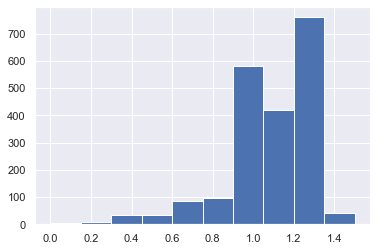

In [122]:
##sns.distplot(temp.rate,bins=20)

plt.hist(temp.rate)
plt.show()

#### <span style='color:red;'>  from `1.2` to `1.4` most frequent rating</span>

### <span style='color:blue;'> What is the Most frequent Dog stage</span>

In [128]:
temp.stage.value_counts()  # to explore outliers und unknown 


Unknown         1748
pupper           209
doggo             67
puppo             23
doggopupper       11
floofer            7
doggofloofer       1
doggopuppo         1
Name: stage, dtype: int64

In [125]:
temp2=temp.query('stage!="Unknown"')

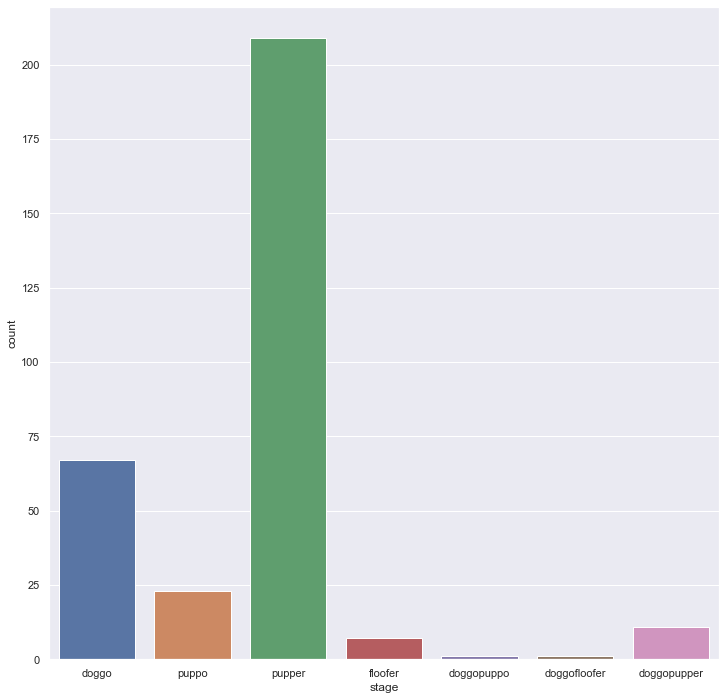

In [131]:
fig, ax = plt.subplots(figsize=(12, 12))
sns.set(style="darkgrid")
ax = sns.countplot(x="stage", data=temp2)

## <span style='color:red;'>`pupper` is most frequnet Dog stage </span>

## 

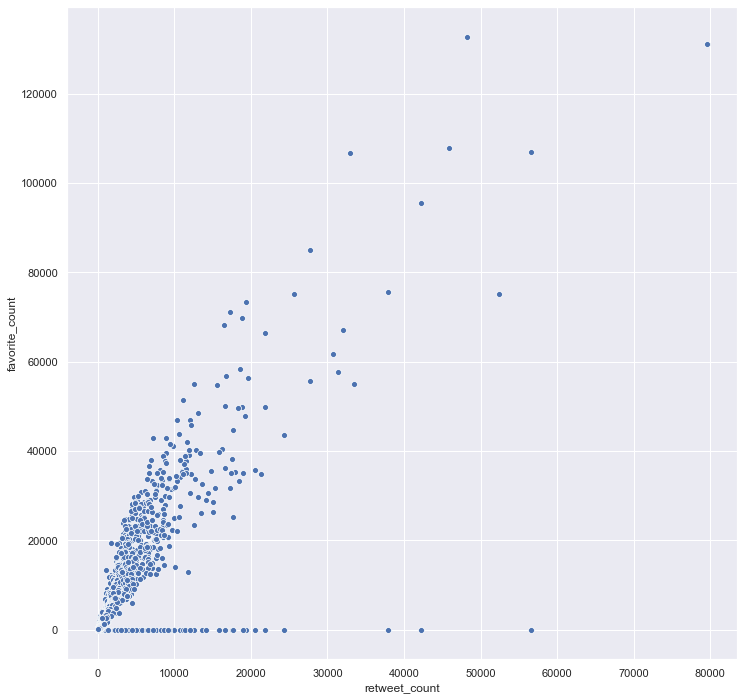

In [132]:
fig, ax = plt.subplots(figsize=(12, 12))
ax=sns.scatterplot(x = "retweet_count", y = "favorite_count", data=twitter_archive_master)


## <span style='color:red;'> tweets without any like could retweets alot</span>

## <span style='color:red;'> almost The more likes increase  The more reweets count increase </span>